# Data

In [1]:
import pandas as pd
import numpy as np
from statistics import mean 
import itertools
import pprint
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict 

In [2]:
df_s = pd.read_excel('Nomad.xlsx', sheet_name = 'Sample')

In [27]:
df_f

,From,To,1,2,3,4,5,6,7,8,...,21,22,23,24,25,26,27,28,29,30
0,Munich,Stuttgart,235,548,560,106,141,888,348,332,...,675,735,72,384,304,352,439,572,784,469
1,Munich,Hannover,976,109,499,278,717,190,365,619,...,516,133,76,475,754,527,714,731,232,384
2,Munich,Cologne,556,853,621,279,714,544,70,188,...,755,291,307,969,354,705,868,509,608,501
3,Munich,Hamburg,742,697,865,570,586,890,811,435,...,621,853,73,852,218,751,144,408,768,296
4,Munich,Berlin,441,952,107,206,411,893,567,212,...,130,810,706,150,288,831,874,518,53,887
5,Stuttgart,Munich,100,901,864,903,168,145,574,71,...,672,151,665,369,913,892,631,638,271,308
6,Stuttgart,Hannover,459,276,367,602,888,580,489,111,...,879,674,560,800,796,942,741,359,116,933
7,Stuttgart,Cologne,651,721,535,285,905,828,534,403,...,601,325,570,52,831,734,538,702,50,720
8,Stuttgart,Hamburg,75,221,537,444,706,444,923,918,...,684,885,48,581,267,682,445,434,777,458
9,Stuttgart,Berlin,626,381,520,446,825,692,410,271,...,425,762,637,963,977,378,365,40,870,537


In [3]:
df_f = pd.read_excel('Nomad.xlsx', sheet_name = 'Full')

In [4]:
def standard(days):
    
    #days = 30
    df = pd.DataFrame(np.random.randint(50,850,size=(30, days)), columns=list(range(1,days+1)))
    df['From'] = df_f.From
    df['To'] = df_f.To
    
    home_city = 'Munich'
    cities = set(df_f.From)
    cost = list()
    total_cost = list()
    cities_visited = set()
    route = list()


    #df = pd.DataFrame(np.random.randint(50,850,size=(len(df_e), days)), columns=list(range(1,days+1)))
    #df['From'] = df_e.From
    #df['To'] = df_e.To
    for i in range(1,days+1):
        if i == 1:
            start_idx = df[df.From == home_city][i].idxmin()
            cost.append(min(df[i]))

            from_city = df.iloc[start_idx]['From']
            to_city = df.iloc[start_idx]['To']

            cities_visited.add(from_city)
            cities_visited.add(to_city)

            route.append(from_city)   
            route.append(to_city)

        else:
            start_idx = df[df.From == to_city][i].idxmin()
            cost.append(min(df[df.From == to_city][i]))

            from_city = df.iloc[start_idx]['From']
            to_city = df.iloc[start_idx]['To']

            cities_visited.add(from_city)
            cities_visited.add(to_city)

            route.append(to_city)

            if (cities_visited) == (cities):
                total_cost.append(sum(cost))
                return total_cost
                break

In [5]:
def price_dip(days):
    
    #days = 30
    df = pd.DataFrame(np.random.randint(50,850,size=(30, days)), columns=list(range(1,days+1)))
    df['From'] = df_f.From
    df['To'] = df_f.To
    
    home_city = 'Munich'
    cities = set(df_f.From)
    cost = list()
    total_cost = list()
    cities_visited = set()
    route = list()


    #df = pd.DataFrame(np.random.randint(50,850,size=(len(df_e), days)), columns=list(range(1,days+1)))
    #df['From'] = df_e.From
    #df['To'] = df_e.To
    for i in range(1,days+1):
        if i == 1:
            start_idx = df[df.From == home_city][i].idxmin()
            cost.append(min(df[i]))

            from_city = df.iloc[start_idx]['From']
            to_city = df.iloc[start_idx]['To']

            cities_visited.add(from_city)
            cities_visited.add(to_city)

            route.append(from_city)   
            route.append(to_city)

        else:
            if (i < days - 1):
                if (min(df[df.From == to_city][i]) > min(df[df.From == to_city][i+1])):
                        continue
                start_idx = df[df.From == to_city][i].idxmin()
                cost.append(min(df[df.From == to_city][i]))

                from_city = df.iloc[start_idx]['From']
                to_city = df.iloc[start_idx]['To']

                cities_visited.add(from_city)
                cities_visited.add(to_city)

                route.append(to_city)

                if (cities_visited) == (cities):
                    total_cost.append(sum(cost))
                    return total_cost
                
price_dip(30)

[1052]

In [6]:
#price dip, price dip as well for last city
def price_dip_all(days):
    
    #days = 40
    df = pd.DataFrame(np.random.randint(50,850,size=(30, days)), columns=list(range(1,days+1)))
    df['From'] = df_f.From
    df['To'] = df_f.To
    
    home_city = 'Munich'
    cities = set(df_f.From)
    cost = list()
    total_cost = list()
    route = list()
    cities_visited = set()

    for i in range(1,days+1):
        if i == 1:
            start_idx = df[df.From == home_city][i].idxmin()
            cost.append(min(df[i]))

            from_city = df.iloc[start_idx]['From']
            to_city = df.iloc[start_idx]['To']

            cities_visited.add(from_city)
            cities_visited.add(to_city)
            cities_left = cities - cities_visited
            route.append(from_city)   
            route.append(to_city)

        else:
            if (i < days - 1):
                if len(cities_left) == 1:
                    if (min(df[df.From == to_city][i]) > min(df[df.From == to_city][i+1])):
                            continue
                    cost.append(df[(df.From == to_city) & (df.To == list(cities_left)[0])][i].values[0])
                    from_city = df.iloc[start_idx]['From']
                    to_city = df.iloc[start_idx]['To']

                    cities_visited.add(from_city)
                    cities_visited.add(to_city)

                    route.append(list(cities_left)[0])
                    total_cost.append(sum(cost))
                    return total_cost
                    break
                    
                else:
                    if (min(df[df.From == to_city][i]) > min(df[df.From == to_city][i+1])):
                            continue
                    start_idx = df[df.From == to_city][i].idxmin()
                    cost.append(min(df[df.From == to_city][i]))

                    from_city = df.iloc[start_idx]['From']
                    to_city = df.iloc[start_idx]['To']

                    cities_visited.add(from_city)
                    cities_visited.add(to_city)
                    
                    cities_left = cities - cities_visited
                    #print(cities_left)
                    route.append(to_city)

price_dip_all(30)

[1455]

In [21]:
standard_list = list()
price_dip_list = list()
price_dip_all_list = list()

for _ in range(15):
    
    standard_list.append(standard(30))
    price_dip_list.append(price_dip(40))
    price_dip_all_list.append(price_dip_all(30))

standard_list = list(itertools.chain(*standard_list))
price_dip_list = list(itertools.chain(*price_dip_list))
price_dip_all_list = list(itertools.chain(*price_dip_all_list))    
    
print('lowest strategy mean',mean(standard_list))
print('price dip strategy mean', mean(price_dip_list))
print('price dip all strategy mean', mean(price_dip_all_list))

lowest strategy mean 1716.2
price dip strategy mean 1056
price dip all strategy mean 983


In [22]:
stats.ttest_ind(a=standard_list,b=price_dip_list,equal_var=False)

Ttest_indResult(statistic=3.227783061215221, pvalue=0.0034754369302249337)

In [23]:
stats.ttest_ind(a=price_dip_list,b=price_dip_all_list,equal_var=False)

Ttest_indResult(statistic=0.5324365933261047, pvalue=0.59955749623872)

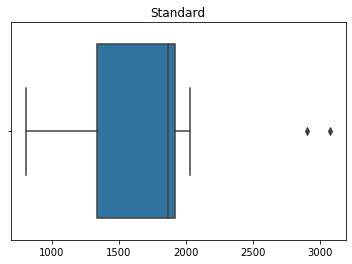

In [24]:
ax = sns.boxplot(x=standard_list).set_title("Standard")

Text(0.5, 1.0, 'Standard')

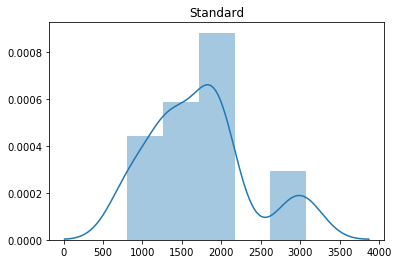

In [25]:
sns.distplot(standard_list).set_title("Standard")

Text(0.5, 1.0, 'Price Dip')

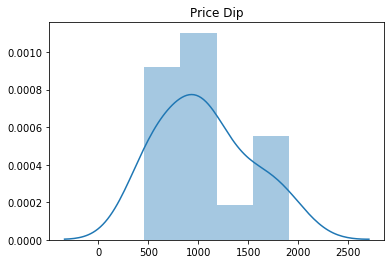

In [26]:
sns.distplot(price_dip_list).set_title("Price Dip")

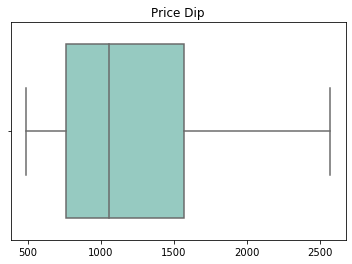

In [12]:
ax = sns.boxplot(x=price_dip_list, palette="Set3").set_title("Price Dip")

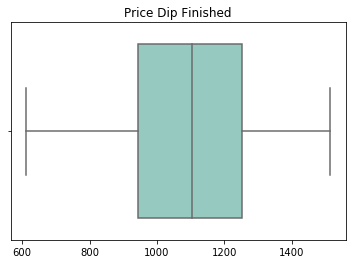

In [13]:
ax = sns.boxplot(x=price_dip_all_list, palette="Set3").set_title("Price Dip Finished")

In [14]:
price_dip_dict = defaultdict(int) 
standard_dict = defaultdict(int) 
price_dip_all_dict = defaultdict(int) 
k = 100

for _ in range(k):
    for days in range(10,41,5):
        standard_list = list()
        price_dip_list = list()
        price_dip_all_list = list()

        standard_list.append(standard(days))
        price_dip_list.append(price_dip(days))
        price_dip_all_list.append(price_dip_all(days))

        standard_dict[days] += standard_list.count(None)
        price_dip_dict[days] += price_dip_list.count(None)
        price_dip_all_dict[days] += price_dip_all_list.count(None)

In [15]:
print(standard_dict)
print(price_dip_dict)
print(price_dip_all_dict)

defaultdict(<class 'int'>, {10: 41, 15: 19, 20: 6, 25: 1, 30: 1, 35: 1, 40: 0})
defaultdict(<class 'int'>, {10: 93, 15: 71, 20: 35, 25: 17, 30: 17, 35: 5, 40: 2})
defaultdict(<class 'int'>, {10: 85, 15: 29, 20: 8, 25: 2, 30: 0, 35: 1, 40: 0})


<ipython-input-16-a105fd7fbad8>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
<ipython-input-16-a105fd7fbad8>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


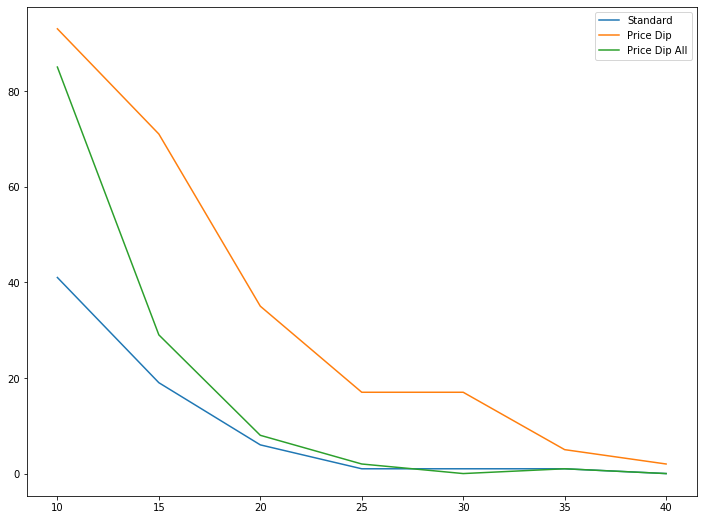

In [16]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.plot(list(standard_dict.keys()), list(standard_dict.values()))
ax = fig.add_subplot(111)
ax.plot(list(standard_dict.keys()), list(price_dip_dict.values()))
ax = fig.add_subplot(111)
ax.plot(list(standard_dict.keys()), list(price_dip_all_dict.values()))
plt.legend(['Standard', 'Price Dip', 'Price Dip All'], loc='upper right')

plt.show()